In [1]:
from ground_roll import ground_roll

In [2]:
gr = ground_roll()

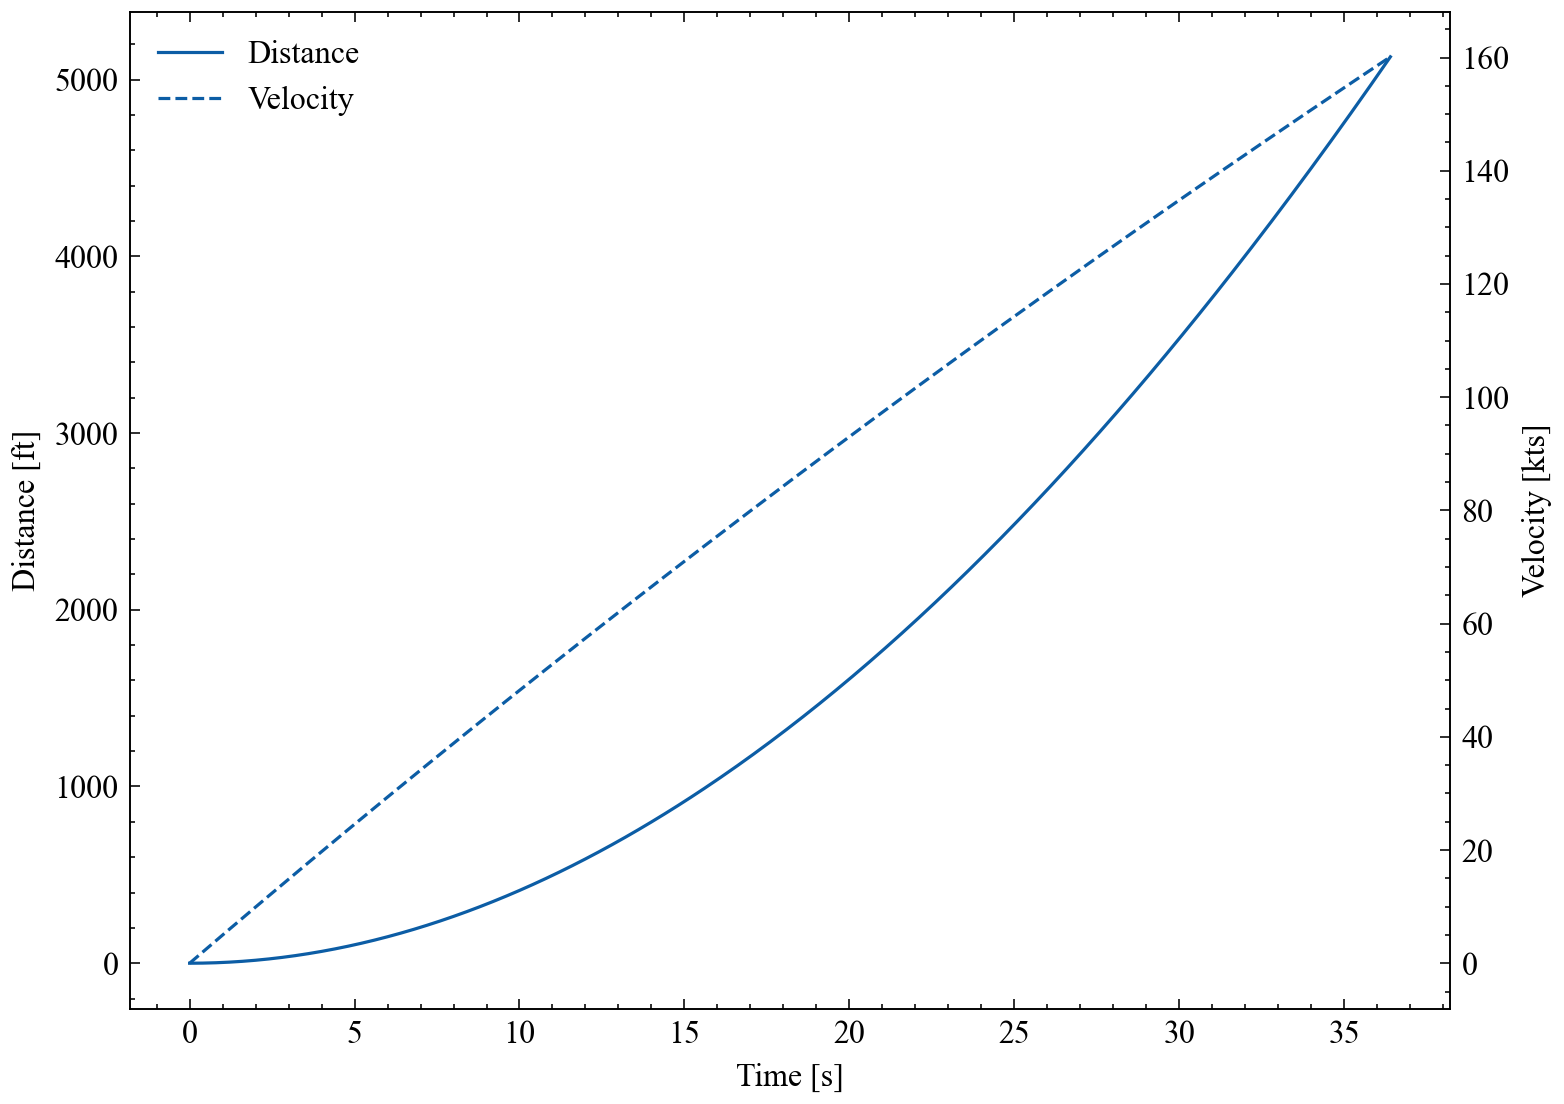

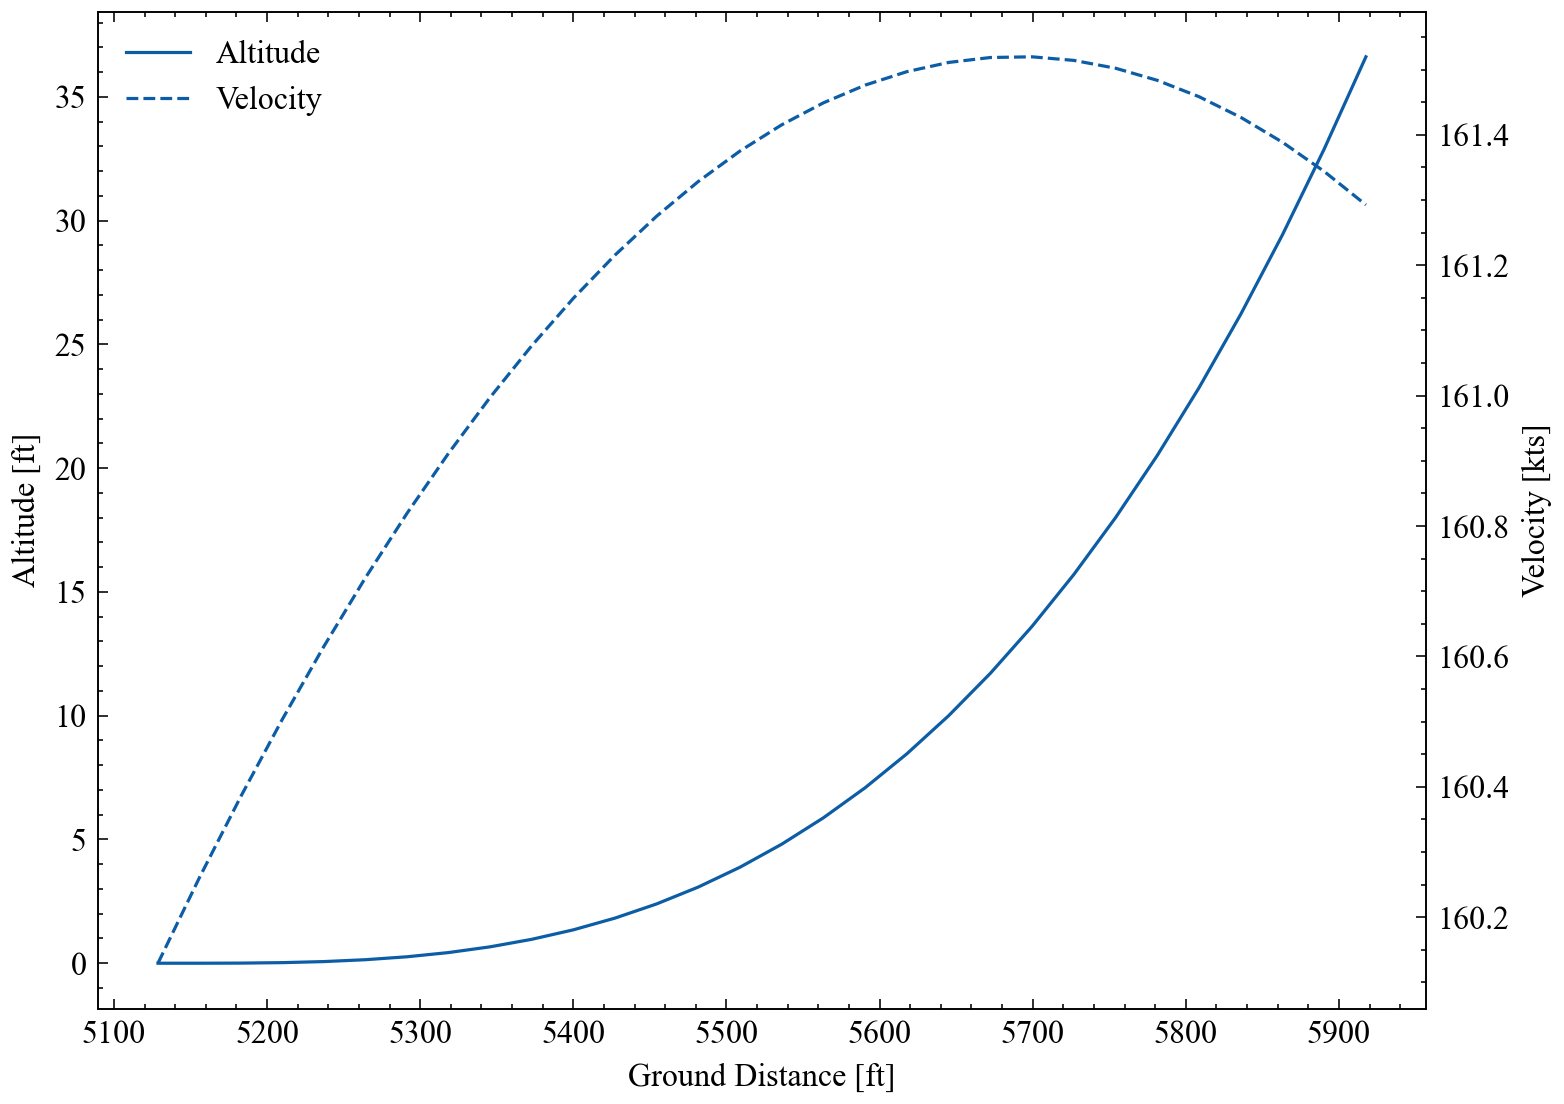

In [3]:
gr.no_wind()

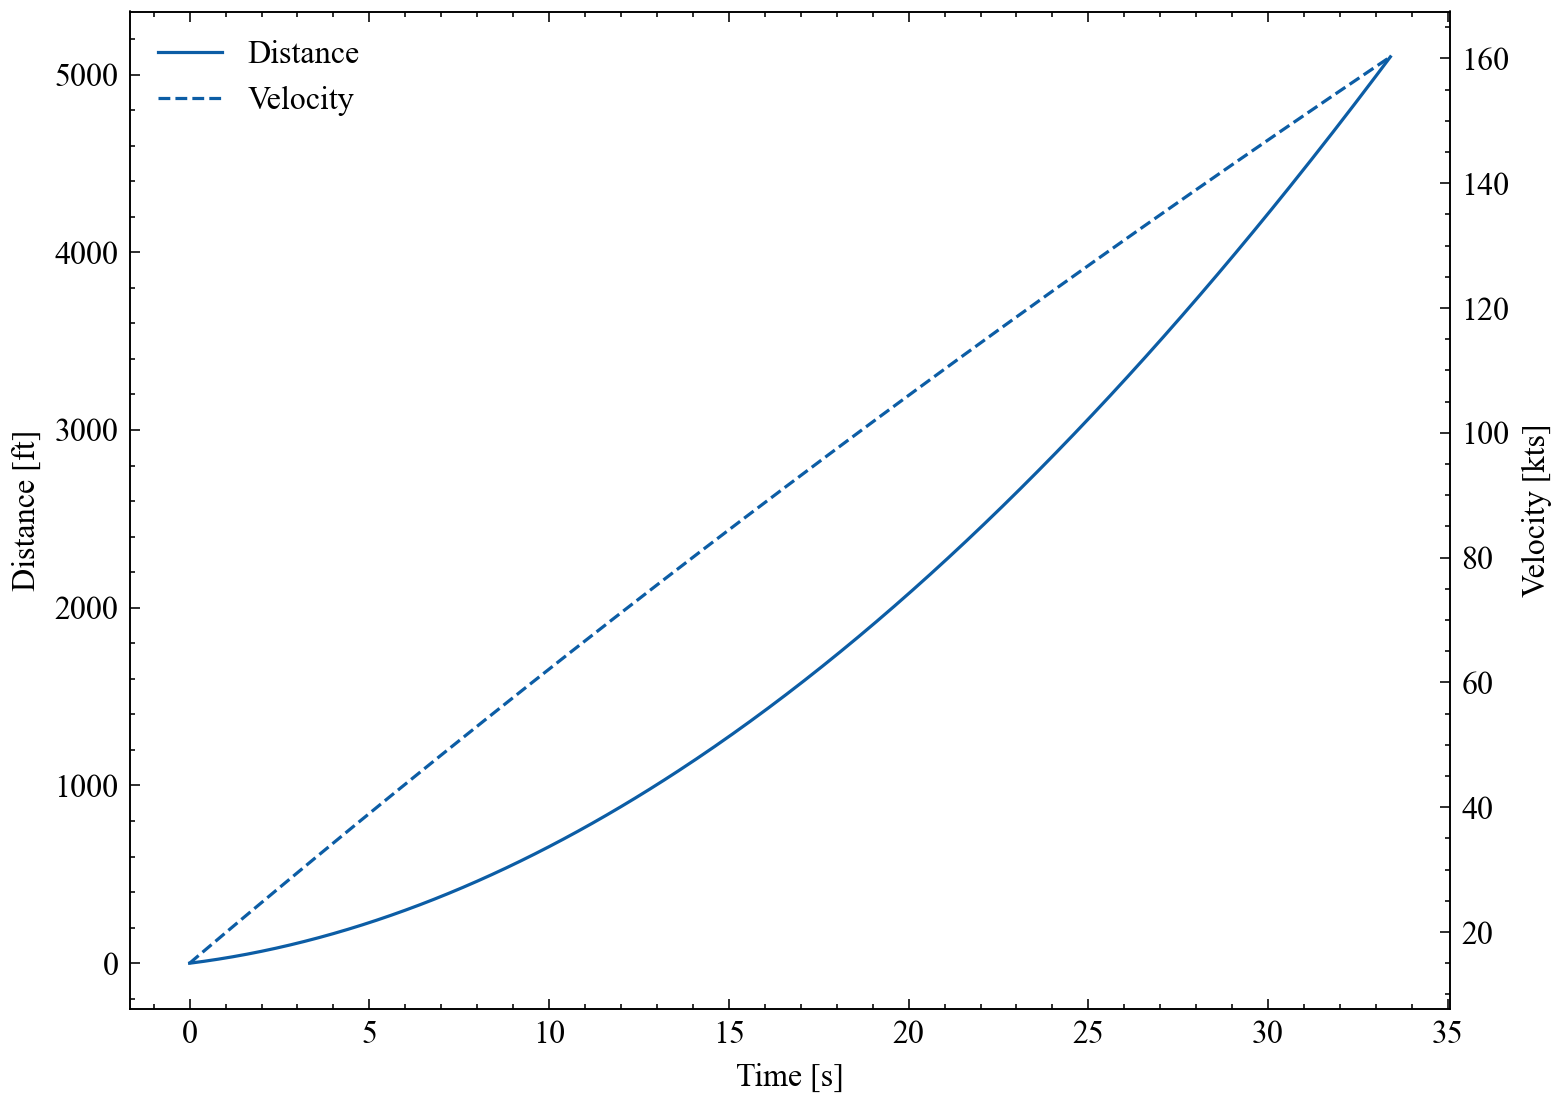

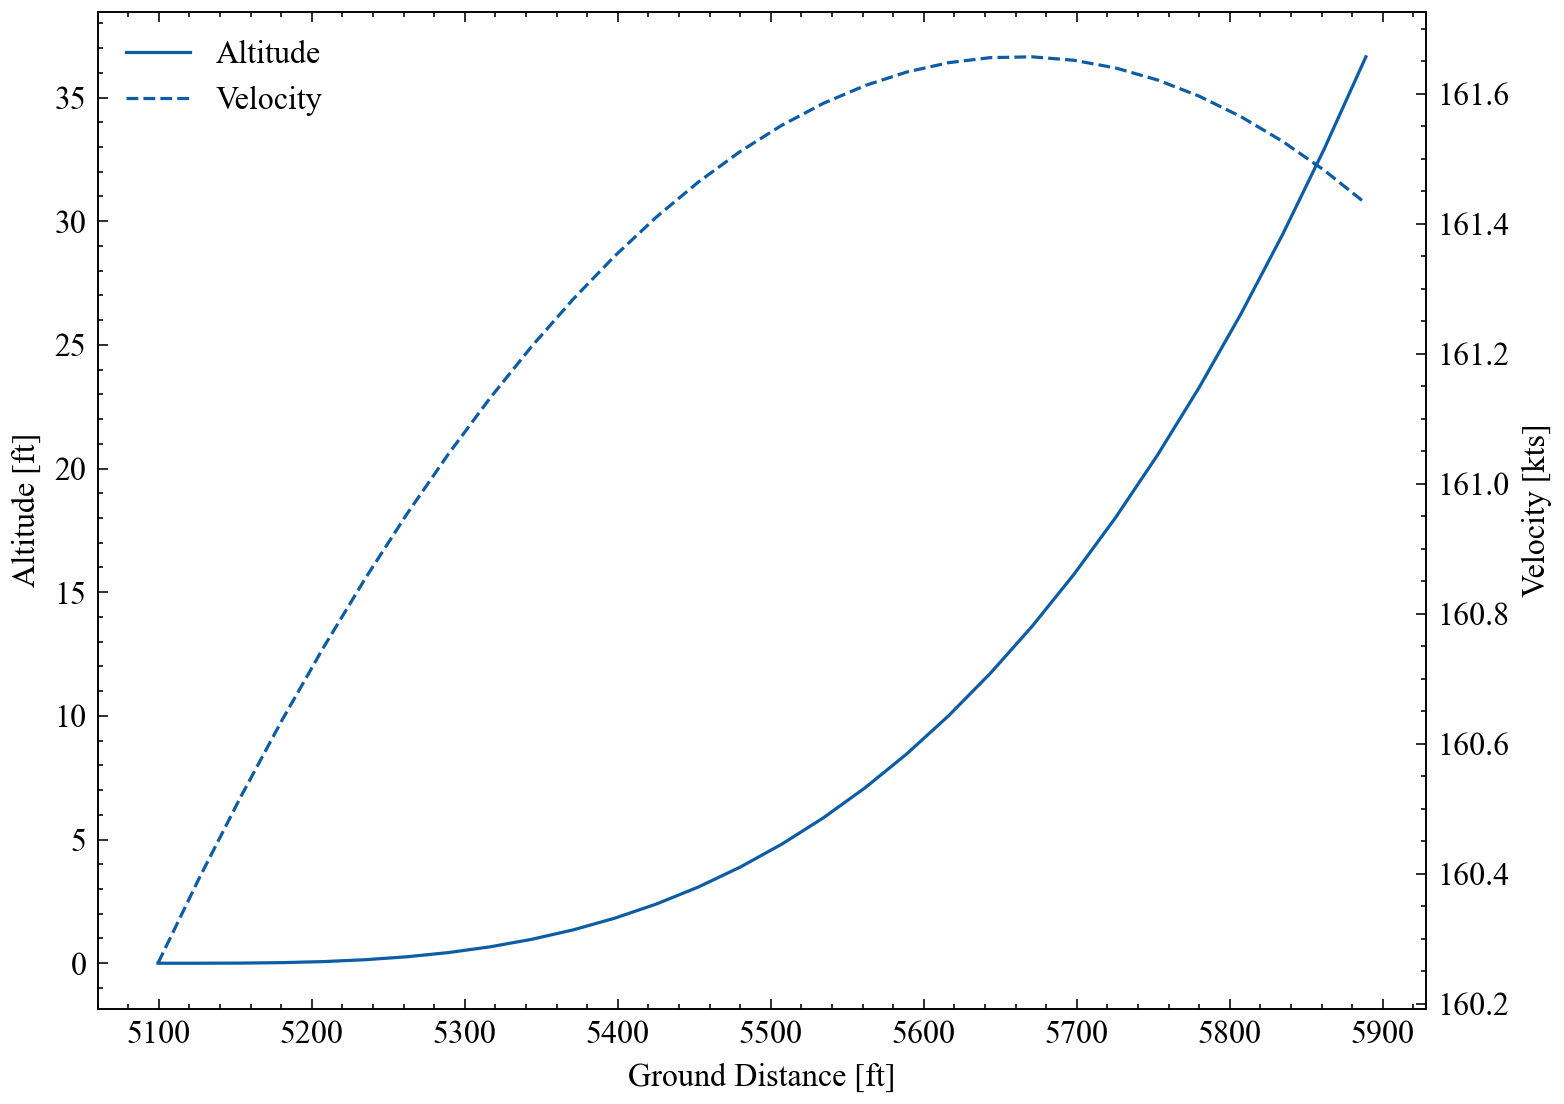

In [4]:
gr.wind()

In [5]:
gr.analytical_approx()

gr.gr_distance[-1]

240875.0522314035


1563.2452651945712

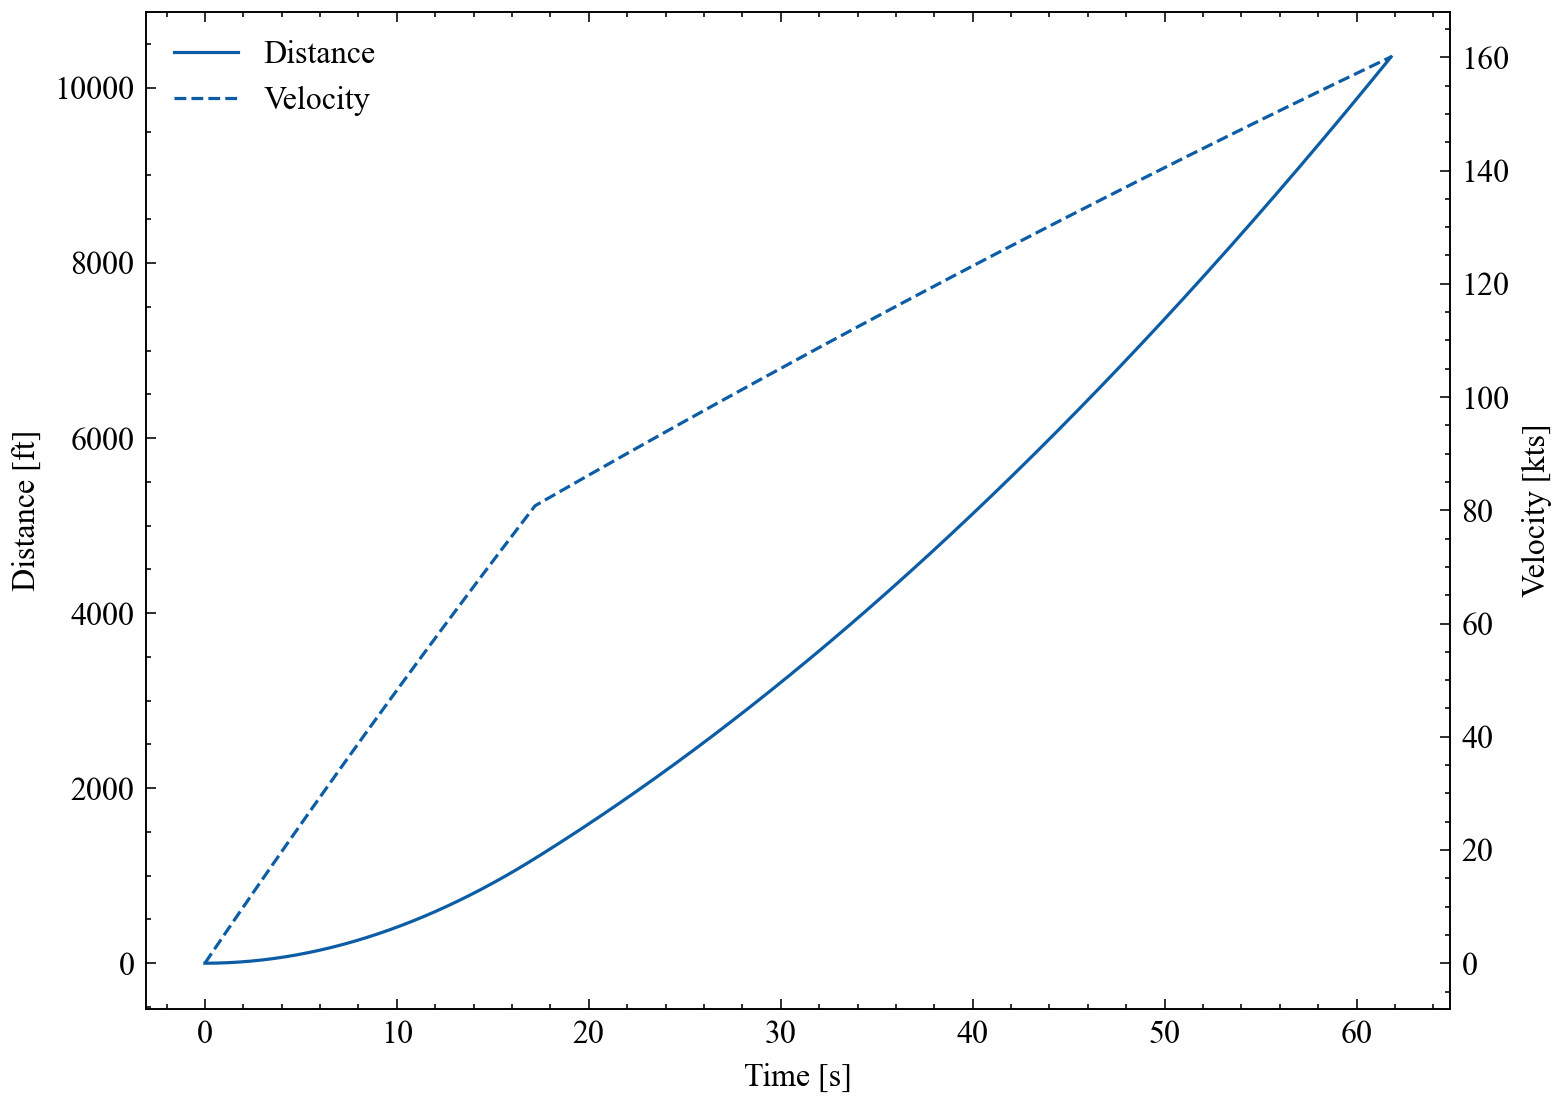

In [6]:
gr.engine_loss()